# Sprint 4: Análisis de cohortes


<div class="session-header">

## 🎯 Objetivo de la sesión  
Capacitar a los estudiantes en el uso de CTEs en SQL para realizar análisis de cohortes: definir cohortes por fecha de registro o primera compra, agrupar usuarios, y calcular métricas de retención y comportamiento a lo largo del tiempo.

</div>

<div class="session-agenda">

### 📋 Agenda  
1. **Introducción al análisis de cohortes**  
   - ¿Qué es una cohorte y por qué importa?  
   - Tipos de cohortes (por fecha de registro, fecha de primera compra, campaña, etc.)  

2. **Cómo estructurar consultas con CTE para cohortes**  
   - Sintaxis básica de `WITH`  
   - Ventajas: legibilidad, modularidad y reutilización  

3. **Ejemplo guiado** 

4. **Taller práctico**  
   - Ejercicios de agrupación por cohorte  
   - Cálculo de métricas de retención en distintos periodos  
   - Segmentación de cohortes por canal de marketing  

5. **Cierre y próximos pasos**  
   - Repaso de conceptos clave 
</div>


<!-- Cohort Analysis: Teoría y Conceptos 🔍 -->

<h2>¿Qué es el Análisis de Cohortes?</h2>  
<p>El análisis de cohortes agrupa usuarios por una característica común (por ejemplo, fecha de registro o primera compra) y sigue su comportamiento a lo largo del tiempo. Así podemos medir retención, LTV, engagement y el impacto de cambios en producto o campaña.</p>

<h2>Tipos de Cohortes</h2>  
<ul>
  <li><strong>Cohortes de Adquisición:</strong> Usuarios agrupados según <em>cuándo</em> se registraron o hicieron su primera compra.</li>
  <li><strong>Cohortes de Comportamiento:</strong> Usuarios que comparten un patrón (p. ej., todos los que usaron un cupón, vieron X producto, hicieron una devolución).</li>
  <li><strong>Cohortes por Segmento Demográfico o Fuente:</strong> Agrupaciones basadas en país, canal de adquisición (organic vs. paid), device, género, etc.</li>
</ul>

<h2>¿Para Qué y Cuándo Usar Cohortes?</h2>  
<ul>
  <li>💡 <strong>Retención:</strong> ¿Qué % de usuarios de la cohorte de enero sigue comprando en febrero, marzo…?</li>
  <li>💡 <strong>LTV y Revenue:</strong> ¿Cómo evoluciona el ingreso medio por cohorte a 30, 60 o 90 días?</li>
  <li>💡 <strong>Impacto de Cambios:</strong> Comparar cohorte pre- vs. post–lanzamiento de nueva funcionalidad o campaña.</li>
</ul>

<h2>Agrupaciones y Segmentaciones Más Comunes</h2>  
<ul>
  <li><strong>Periodo de Ingreso:</strong> día, semana o mes de la <em>primera interacción</em>.</li>
  <li><strong>Canal de Adquisición:</strong> organic search, paid search, email, social.</li>
  <li><strong>Geografía o Device:</strong> país, región, desktop vs. mobile.</li>
  <li><strong>Plan o Producto:</strong> tipo de suscripción, categoría de producto comprado.</li>
</ul>


![alt text](https://pgsconsulting.es/wp-content/uploads/2024/01/analisis-cohorte-post-1024x557.png)

* A. El número de clientes nuevos aumenta cada vez, lo que pone de manifiesto que la compañía mejora su captación de clientes.

* B. La permanencia de clientes es mayor para los clientes más recientes: la compañía cada vez es más efectiva en la retención de clientes.

* C. Hay un aumento significativo en la proporción de clientes que permanecen entre las cohortes de dic’21 y ene’22, lo que indica que la empresa probablemente empezó a identificar segmentos de clientes más fieles a los que dirigir las nuevas ventas.

* D. Hay un descenso significativo en la proporción de clientes restantes entre los meses 11 y 12, lo que indica que la empresa tiene clientes con planes de suscripción mensuales y anuales no pueden darse de baja hasta pasado un año.

* E. En promedio, la empresa es capaz de retener a dos tercios de los clientes que adquiere transcurrido el primer año. Para mejorar esta ratio, puede trabajar para mejorar la adquisición de clientes y/o la retención de los ya existentes. Casi siempre es más fácil retener a los clientes que adquirir nuevos.

[More info](https://pgsconsulting.es/2024/02/el-analisis-de-cohortes-para-la-toma-de-decisiones-empresariales/)

![alt text](https://www.genetsisgroup.com/wp-content/uploads/2021/10/Blog_EstudiosDeCohortes_ejemploInterior_ok-1024x357.jpg)

Se pueden ver filas significativas, marcadas en amarillo:

* **Línea Horizontal:** los porcentajes en esa cohorte son mayores que el resto, puede indicar que los usuarios captados en marzo son más rentables que el usuario medio. Se deberían analizar las acciones realizadas en marzo y que hayan conducido a captar usuarios de mayor calidad.

* **Línea diagonal:** en el mes de agosto y para todas las cohortes hay un “oscurecimiento de la celda”, es decir, un valor más alto. Esto indica que en ese mes se realizó alguna acción o se dio alguna circunstancia que favoreció que los usuarios volvieran a comprar. El tiempo dirá si, además, la cohorte de agosto es de usuarios de calidad a largo plazo.

* **Línea vertical:** coincidiendo con la cohorte 7, es decir, con el séptimo mes de ser captado el usuario, se ve que hay un incremento en el porcentaje de compras. Este dato también es digno de ser analizado, puede indicar, por ejemplo, que hay usuarios que repiten para comprar recambios para un aparato que dura 6 meses, o que la campaña automática consistente en enviar un cupón descuento a los 6 meses de su primera compra está siendo un éxito.

[More Info](https://www.genetsisgroup.com/los-estudios-de-cohortes-aplicados-al-marketing-y-al-e-commerce/)

**Base de datos:** [`ecommerce_demo.db`](https://github.com/gbuvoli/Datasets/raw/refs/heads/main/ecommerce_demo.db)


**Tablas:**  
- `customers`  
- `sales`  
- `discount_coupon`  
- `marketing_spend`  
- `tax_amount`  

![Esquema](images/ecommerceDemo.png)

In [98]:
import sqlite3
import pandas as pd

# Hacemos la conexión a la Database
conn = sqlite3.connect("ecommerce_demo.db")


### 1. Crear la cohorte de primera compra 

* Obtener la primera fecha de compra de cada cliente.
* Crear una columna cohort que agrupe por mes.
* Muestra el customer_id, la fecha de compra y su cohorte mensual.

In [99]:
query= '''
SELECT 
customer_id,
event_time,
event_name,
date(event_time, 'start of month') AS cohort

from events
WHERE event_name = 'purchase'

'''
pd.read_sql(query, conn)

,customer_id,event_time,event_name,cohort
0,17850,2019-01-01 00:00:00,purchase,2019-01-01
1,17850,2019-01-01 00:00:00,purchase,2019-01-01
2,17850,2019-01-01 00:00:00,purchase,2019-01-01
3,17850,2019-01-01 00:00:00,purchase,2019-01-01
4,17850,2019-01-01 00:00:00,purchase,2019-01-01
...,...,...,...,...
52919,14410,2019-12-31 00:00:00,purchase,2019-12-01
52920,14410,2019-12-31 00:00:00,purchase,2019-12-01
52921,14410,2019-12-31 00:00:00,purchase,2019-12-01
52922,14600,2019-12-31 00:00:00,purchase,2019-12-01


### 2. Retencion en el tiempo

> “De los clientes que se unen cada mes, ¿cuántos siguen activos después de 1, 2, 3 meses… o incluso un año?”

[Manejo de fechas en SQLite](https://www.sqlitetutorial.net/sqlite-date-functions/sqlite-date-function/)



In [100]:
#En valores absolutos
query= '''

WITH 

 purchases AS(
  select customer_id,event_time
  FROm events
  WHERE event_name='purchase'
),

cohorts AS (
  SELECT customer_id, 
  date(MIN(event_time), 'start of month') AS cohorte
  FROM purchases
  GROUP BY customer_id
)

SELECT 
COUNT(DISTINCT c.customer_id) AS cantidad,
strftime('%Y-%m', c.cohorte) AS cohorte,
date(p.event_time,'start of month') AS purchase_month,

CAST(
(julianday(date(p.event_time, 'start of month')) - julianday(c.cohorte)) / 28
 AS INTEGER
) AS month_number

FROM cohorts c
JOIN purchases p ON c.customer_id = p.customer_id
GROup BY c.cohorte, purchase_month, month_number

    '''
df=pd.read_sql(query, conn)
df

,cantidad,cohorte,purchase_month,month_number
0,215,2019-01,2019-01-01,0
1,13,2019-01,2019-02-01,1
2,24,2019-01,2019-03-01,2
3,34,2019-01,2019-04-01,3
4,23,2019-01,2019-05-01,4
...,...,...,...,...
73,6,2019-10,2019-11-01,1
74,4,2019-10,2019-12-01,2
75,68,2019-11,2019-11-01,0
76,7,2019-11,2019-12-01,1


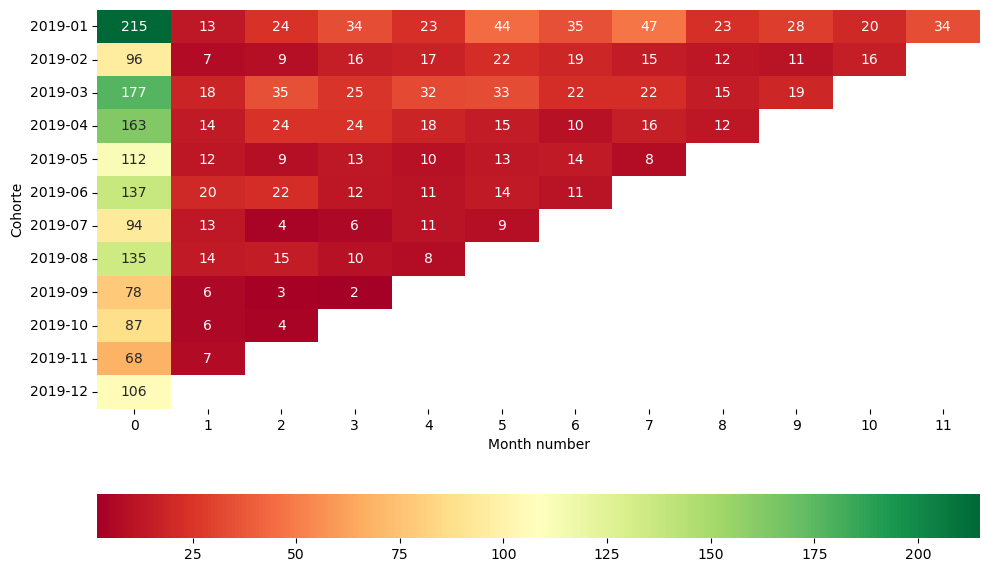

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

pivot=df.pivot_table(columns='month_number',
               values='cantidad',
               index='cohorte')


plt.figure(figsize=(10, 6))

sns.heatmap(
    pivot,
    annot=True,
    fmt='.0f',
    cmap='RdYlGn',
    cbar_kws={'orientation': 'horizontal'}
)

plt.xlabel('Month number')
plt.ylabel('Cohorte')
plt.tight_layout()
plt.show()

In [102]:
#En % respecto a la cohorte inicial

query= '''

WITH 

 purchases AS(
  select customer_id,event_time
  FROm events
  WHERE event_name='purchase'
),

cohorts AS (
  SELECT customer_id, 
  date(MIN(event_time), 'start of month') AS cohorte
  FROM purchases
  GROUP BY customer_id
),

month_0 AS (
  SELECT cohorte, 
 COUNT(DISTINCT customer_id) AS cantidad_m0
 FROM cohorts
 GROUP BY cohorte
)

SELECT 
strftime('%Y-%m', c.cohorte) AS cohorte,
date(p.event_time,'start of month') AS purchase_month,

CAST(
(julianday(date(p.event_time, 'start of month')) - julianday(c.cohorte)) / 28
 AS INTEGER
) AS month_number,

ROUND(
    COUNT(DISTINCT c.customer_id) * 100.0 / m.cantidad_m0,
    2
      ) AS porcentaje

FROM cohorts c
JOIN purchases p ON c.customer_id = p.customer_id
JOIN month_0 m ON m.cohorte = c.cohorte
GROup BY c.cohorte, purchase_month, month_number
    '''
df=pd.read_sql(query, conn)
df

,cohorte,purchase_month,month_number,porcentaje
0,2019-01,2019-01-01,0,100.00
1,2019-01,2019-02-01,1,6.05
2,2019-01,2019-03-01,2,11.16
3,2019-01,2019-04-01,3,15.81
4,2019-01,2019-05-01,4,10.70
...,...,...,...,...
73,2019-10,2019-11-01,1,6.90
74,2019-10,2019-12-01,2,4.60
75,2019-11,2019-11-01,0,100.00
76,2019-11,2019-12-01,1,10.29


In [103]:
pivot=df.pivot_table(columns='month_number',
               values='porcentaje',
               index='cohorte')
pivot

month_number,0,1,2,3,4,5,6,7,8,9,10,11
cohorte,,,,,,,,,,,,
2019-01,100.0,6.05,11.16,15.81,10.70,20.47,16.28,21.86,10.70,13.02,9.30,15.81
2019-02,100.0,7.29,9.38,16.67,17.71,22.92,19.79,15.63,12.50,11.46,16.67,NaN
2019-03,100.0,10.17,19.77,14.12,18.08,18.64,12.43,12.43,8.47,10.73,NaN,NaN
2019-04,100.0,8.59,14.72,14.72,11.04,9.20,6.13,9.82,7.36,NaN,NaN,NaN
2019-05,100.0,10.71,8.04,11.61,8.93,11.61,12.50,7.14,NaN,NaN,NaN,NaN
2019-06,100.0,14.60,16.06,8.76,8.03,10.22,8.03,NaN,NaN,NaN,NaN,NaN
2019-07,100.0,13.83,4.26,6.38,11.70,9.57,NaN,NaN,NaN,NaN,NaN,NaN
2019-08,100.0,10.37,11.11,7.41,5.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09,100.0,7.69,3.85,2.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


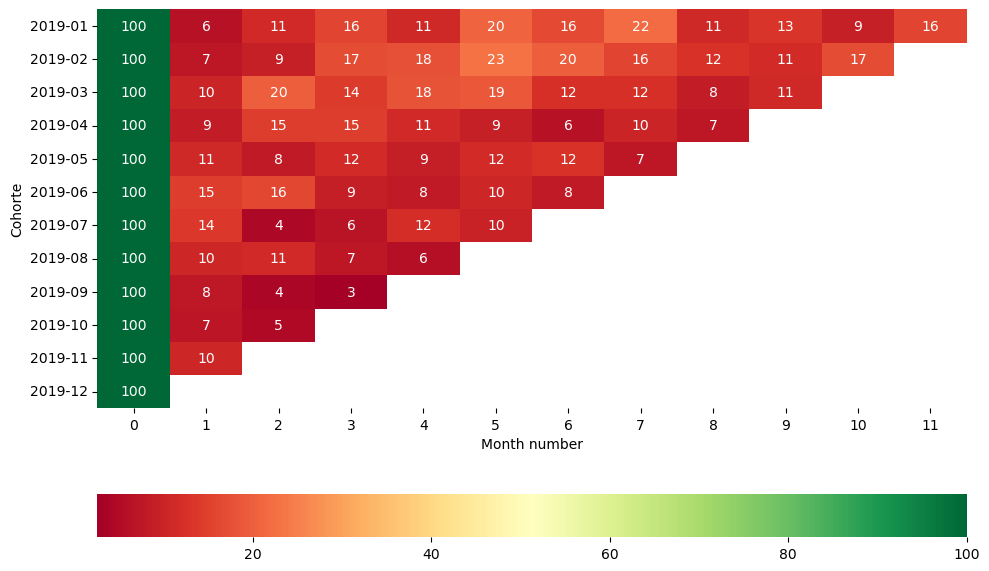

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.heatmap(
    pivot,
    annot=True,
    fmt='.0f',
    cmap='RdYlGn',
    cbar_kws={'orientation': 'horizontal'}
)

plt.xlabel('Month number')
plt.ylabel('Cohorte')
plt.tight_layout()
plt.show()

## Segmentaciones

> Influye el tipo de producto adquirido en la retención de las cohortes?

In [123]:
query= '''

WITH 

purchases AS (
  SELECT 
    customer_id,
    event_time,
    product_category
  FROM events
  WHERE event_name = 'purchase'
),

first_purchase AS (
  SELECT
    customer_id,
    MIN(event_time) AS first_purchase_time
  FROM purchases
  GROUP BY customer_id
),

cohorts AS (
  SELECT
    f.customer_id,
    date(f.first_purchase_time, 'start of month') AS cohort_month,
    p.product_category AS first_product_category
  FROM first_purchase f
  JOIN purchases p
    ON p.customer_id = f.customer_id
   AND p.event_time   = f.first_purchase_time
),

month_0 AS (
  SELECT
    cohort_month,
    first_product_category,
    COUNT(DISTINCT customer_id) AS cohort_size
  FROM cohorts
  GROUP BY cohort_month, first_product_category
),

activity AS (
  SELECT
    c.customer_id,
    c.cohort_month,
    c.first_product_category,
    date(p.event_time, 'start of month') AS purchase_month,
    CAST(
      (julianday(date(p.event_time, 'start of month')) - julianday(c.cohort_month)) / 28
      AS INTEGER
    ) AS month_number
  FROM cohorts   c
  JOIN purchases p
    ON p.customer_id = c.customer_id
)

SELECT
  a.cohort_month,
  a.first_product_category,
  a.month_number,
  ROUND(
    COUNT(DISTINCT a.customer_id) * 100.0 / m.cohort_size,
    2
  ) AS retention_pct
FROM activity a
JOIN month_0 m
  ON m.cohort_month          = a.cohort_month
 AND m.first_product_category = a.first_product_category
WHERE a.month_number BETWEEN 0 AND 11
GROUP BY
  a.cohort_month,
  a.first_product_category,
  a.month_number
ORDER BY
  a.cohort_month,
  a.first_product_category,
  a.month_number


    '''
df=pd.read_sql(query, conn)
df

,cohort_month,first_product_category,month_number,retention_pct
0,2019-01-01,Accessories,0,100.0
1,2019-01-01,Accessories,3,100.0
2,2019-01-01,Accessories,5,100.0
3,2019-01-01,Accessories,7,100.0
4,2019-01-01,Accessories,8,100.0
...,...,...,...,...
1020,2019-12-01,Nest-Canada,0,100.0
1021,2019-12-01,Nest-USA,0,100.0
1022,2019-12-01,Notebooks & Journals,0,100.0
1023,2019-12-01,Office,0,100.0


In [126]:
pivot=df.pivot_table(columns='month_number',
               values='retention_pct',
               index='first_product_category')
pivot

month_number,0,1,2,3,4,5,6,7,8,9,10,11
first_product_category,,,,,,,,,,,,
Accessories,100.0,16.586667,37.500000,100.000000,22.500000,80.000000,NaN,100.000000,100.000000,NaN,NaN,NaN
Android,100.0,50.000000,20.000000,22.500000,30.000000,22.500000,25.000000,50.000000,NaN,25.000000,NaN,NaN
Apparel,100.0,9.915455,10.449000,10.697778,10.313750,14.385714,11.038333,12.032000,9.755000,10.106667,13.500,13.92
Backpacks,100.0,23.610000,16.250000,37.500000,58.335000,22.915000,18.750000,83.335000,NaN,NaN,NaN,NaN
Bags,100.0,7.827273,9.946000,12.225556,7.962500,16.850000,13.284000,13.100000,9.580000,12.933333,11.880,8.20
Bottles,100.0,14.670000,18.226667,12.447500,16.266000,19.448000,9.772000,14.645000,10.447500,13.635000,12.500,9.09
Drinkware,100.0,8.984545,10.007000,11.396667,10.671250,14.015714,11.155000,12.550000,7.645000,12.206667,14.485,15.00
Fun,100.0,18.055000,21.826667,18.136000,18.255000,22.058333,18.653333,27.085000,20.835000,27.085000,NaN,12.50
Gift Cards,100.0,42.860000,14.290000,39.285000,NaN,50.000000,NaN,14.290000,NaN,NaN,100.000,NaN


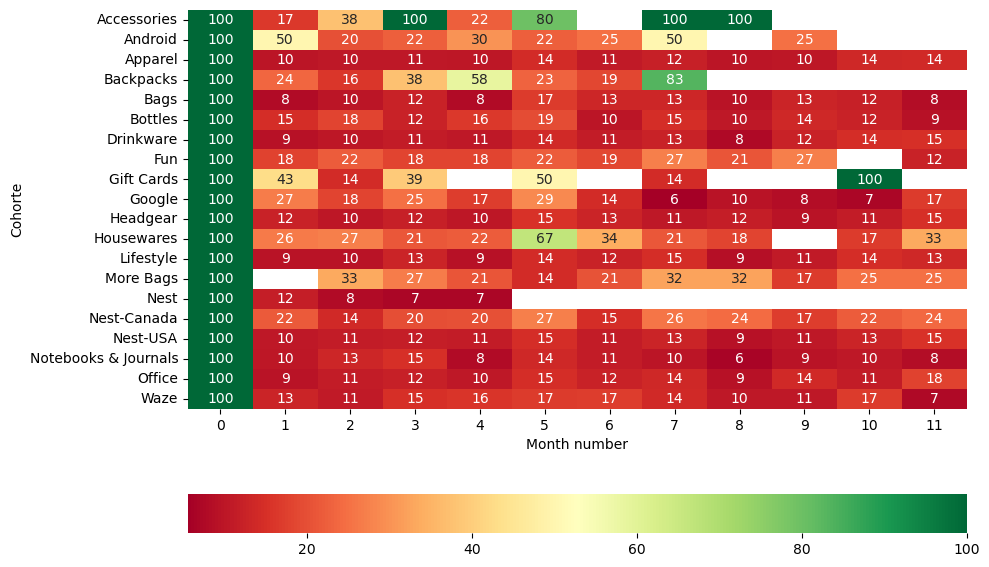

In [127]:
plt.figure(figsize=(10, 6))

sns.heatmap(
    pivot,
    annot=True,
    fmt='.0f',
    cmap='RdYlGn',
    cbar_kws={'orientation': 'horizontal'}
)

plt.xlabel('Month number')
plt.ylabel('Cohorte')
plt.tight_layout()
plt.show()

<h2>💰 ARPU, LTV y métricas de valor del cliente</h2>

En análisis de producto y negocio no basta con saber “cuánto vendimos”.  
Necesitamos entender **cuánto valor genera cada usuario**, por cuánto tiempo, y cómo cambiaría ese valor si mejoramos el producto o un proceso.

Aquí entran métricas como **ARPU**, **LTV** y el análisis de **Revenue Base vs Revenue Simulado**.

---

<h3>1. ARPU (Average Revenue Per User)</h3>

<p><strong>Definición:</strong> Ingreso promedio por usuario en un periodo de tiempo.</p>

Se calcula como:

```text
ARPU = Revenue total en el periodo / Número de usuarios activos en el periodo


**Ejemplos típicos:**

* ARPU mensual (M28): ingresos de enero / usuarios activos en enero.

* ARPU por cohorte: ingresos generados por la cohorte / usuarios de esa cohorte.

<p><strong>¿Para qué sirve?</strong></p> <ul> <li>Comparar cuánto valor genera un usuario hoy vs hace 6 meses.</li> <li>Comparar segmentos (ej. usuarios free vs premium, país A vs país B).</li> <li>Evaluar si un cambio en el producto aumentó el valor promedio generado por usuario.</li> </ul>

<h3>2. ARPPU (Average Revenue Per Paying User)</h3> <p><strong>Definición:</strong> Ingreso promedio por usuario que paga (no todos los activos, solo los que han pagado algo).</p>


`ARPPU = Revenue total / Número de usuarios que pagaron (paying users)`

<p><strong>¿Cuándo se usa?</strong></p> <ul> <li>En productos freemium, donde muchos usuarios activos no pagan nada.</li> <li>Para entender el comportamiento de los usuarios que sí compran, independiente del % de conversión.</li> </ul>

Relación con ARPU:

Si la conversión baja pero los que pagan gastan más, el ARPPU sube, pero el ARPU puede bajar.

ARPU combina volumen (cuántos pagan) y valor (cuánto paga cada uno).

### LTV por cohorte

<p><strong>Definición:</strong> Valor total esperado que un usuario generará durante “toda su vida” como cliente.</p>

Existen muchas formas de aproximarlo, desde muy simples hasta modelos avanzados.

<p><strong>¿Por qué es importante?</strong></p> <ul> <li>Permite saber cuánto puedes invertir en adquisición (CAC) sin perder dinero.</li> <li>Ayuda a comparar la “calidad” de los usuarios antes y después de un cambio de producto o proceso.</li> <li>Se usa para priorizar mejoras: una que aumenta LTV es mucho más valiosa que una que solo sube revenue una vez.</li> </ul>


<p><strong>¿Pasos para calcularlo ?</strong></p>
* Cada cliente entra en una cohorte según el mes de su primera compra.

* `customer_value` calcula cuánto dinero generó ese cliente en total.

* Al final se calcula el promedio de valor por cliente dentro de cada cohorte.

In [108]:
query = '''
WITH 

-- 1) Solo compras
purchases AS (
  SELECT 
    customer_id,
    event_time
  FROM events
  WHERE event_name = 'purchase'
),

-- 2) Primera compra de cada cliente
first_purchase AS (
  SELECT
    customer_id,
    MIN(event_time) AS first_purchase_time
  FROM purchases
  GROUP BY customer_id
),

-- 3) Cohorte = mes de la primera compra
cohorts AS (
  SELECT
    fp.customer_id,
    date(fp.first_purchase_time, 'start of month') AS cohort_month
  FROM first_purchase fp
),

-- 4) Valor total por cliente en toda la tabla de ventas
customer_value AS (
  SELECT
    s.CustomerID AS customer_id,
    SUM(s.Quantity * s.Avg_Price) AS total_value
  FROM sales s
  GROUP BY s.CustomerID
)

-- 5) LTV promedio por cohorte
SELECT
  c.cohort_month,
  ROUND(AVG(cv.total_value), 2) AS avg_value_per_customer,
  COUNT(DISTINCT c.customer_id) AS cohort_size
FROM cohorts c
JOIN customer_value cv
  ON cv.customer_id = c.customer_id
GROUP BY c.cohort_month
ORDER BY c.cohort_month;

'''

pd.read_sql_query(query,conn)


,cohort_month,avg_value_per_customer,cohort_size
0,2019-01-01,4824.74,215
1,2019-02-01,5628.53,96
2,2019-03-01,3779.07,177
3,2019-04-01,2756.63,163
4,2019-05-01,2970.52,112
5,2019-06-01,2137.23,137
6,2019-07-01,2555.91,94
7,2019-08-01,1918.61,135
8,2019-09-01,1944.41,78
9,2019-10-01,2643.41,87


### LTV a 12 meses desde la primera compra

* Definimos cohorte por primera compra.

* Medimos cuánto gasta cada cliente en sus primeros 12 meses.

* Promediamos ese valor por cohorte → “valor medio por cliente” de esa cohorte.

In [109]:
query= '''

WITH 

purchases AS (
  SELECT 
    customer_id,
    event_time
  FROM events
  WHERE event_name = 'purchase'
),

first_purchase AS (
  SELECT
    customer_id,
    MIN(event_time) AS first_purchase_time
  FROM purchases
  GROUP BY customer_id
),

cohorts AS (
  SELECT
    fp.customer_id,
    date(fp.first_purchase_time, 'start of month') AS cohort_month
  FROM first_purchase fp
),

-- Valor por cliente solo dentro de los 12 meses desde la cohorte
customer_value_12m AS (
  SELECT
    c.customer_id,
    c.cohort_month,
    SUM(s.Quantity * s.Avg_Price) AS value_12m
  FROM cohorts c
  JOIN sales s
    ON s.CustomerID = c.customer_id
   AND date(s.Transaction_Date)
       BETWEEN c.cohort_month
           AND date(c.cohort_month, '+12 months')
  GROUP BY
    c.customer_id,
    c.cohort_month
)

SELECT
  cohort_month,
  ROUND(AVG(value_12m), 2) AS avg_value_per_customer_12m,
  COUNT(DISTINCT customer_id) AS cohort_size
FROM customer_value_12m
GROUP BY cohort_month
ORDER BY cohort_month;

'''

pd.read_sql(query, conn)

,cohort_month,avg_value_per_customer_12m,cohort_size
0,2019-01-01,4824.74,215
1,2019-02-01,5628.53,96
2,2019-03-01,3779.07,177
3,2019-04-01,2756.63,163
4,2019-05-01,2970.52,112
5,2019-06-01,2137.23,137
6,2019-07-01,2555.91,94
7,2019-08-01,1918.61,135
8,2019-09-01,1944.41,78
9,2019-10-01,2643.41,87


<h3>4. Otras métricas relacionadas</h3> <ul> <li><strong>Churn Rate (tasa de fuga):</strong> % de usuarios que dejan de usar o pagar el producto en un periodo.</li> </ul>

```
Churn = Usuarios que abandonan / Usuarios al inicio del periodo
Retención = 1 - Churn
```



<ul> <li><strong>CAC (Customer Acquisition Cost):</strong> Costo promedio para adquirir un nuevo cliente.</li> </ul>

```
CAC = Gasto total en marketing & ventas / Nuevos clientes adquiridos
```

<ul> <li><strong>Payback Period:</strong> Tiempo que tarda el LTV en “pagar” el CAC.</li> </ul>

```
Payback ≈ CAC / ARPU mensual

```

## Simulación de mejoras.

Cuando analizas mejoras de producto o procesos (por ejemplo, cambios en el checkout, onboarding, pricing), no solo miras la foto actual. Comparas:

Revenue Base: lo que realmente ocurrió (datos históricos).

Revenue Simulado: lo que habría ocurrido si ciertas tasas hubieran sido mejores.

### Revenue Base

Es el revenue observado con:

* Tasas de conversión reales en cada etapa del funnel.

* Retención real por cohorte.

* Ticket promedio real.

```

Base:
- page_view: 1000 usuarios
- add_to_cart: 300 usuarios
- purchase: 150 usuarios
- Ticket promedio: 20 USD

Revenue base = 150 × 20 = 3000 USD
ARPU base (en este grupo) = 3000 / 1000 = 3 USD


In [110]:
page_view= 1000 #usuarios
add_to_cart=300 #usuarios
purchase = 150

ticket_promedio = 20 #USD

Revenue_base= purchase * ticket_promedio  # 150 x 20 = 3000
ARPU_base = Revenue_base/page_view  # 3000 / 1000 = 3 USD

print(f'revenue base = {Revenue_base}')
print(f'ARPU_base={ARPU_base}')


revenue base = 3000
ARPU_base=3.0


###  Revenue Simulado

Simulas un escenario “what-if”:

* Aumentar la conversión de add_to_cart → purchase.

* Reducir abandonos en checkout.

* Aumentar retención en mes 1/2/3.

* Subir ticket promedio (cross-sell, bundles, etc.).

In [111]:
page_view= 1000 #usuarios
add_to_cart=300 #usuarios
purchase = 170  #aumentamos 20 usuarios

ticket_promedio = 25 #aumentamos +5 USD

Revenue_simulado= purchase * ticket_promedio  
ARPU_simulado = Revenue_base/page_view  

print(f'revenue simulado = {Revenue_simulado}')
print(f'ARPU simulado = {ARPU_simulado}')

revenue simulado = 4250
ARPU simulado = 3.0


## ✅ Conclusiones

1. **No todos los “ingresos altos” son buenos si el valor por usuario es bajo.**  
   Aprendiste que métricas como **ARPU** y **LTV** permiten evaluar la calidad del revenue: no solo importa cuánto vendes, sino cuánto genera cada usuario y durante cuánto tiempo permanece activo.

2. **Las cohortes conectan comportamiento y dinero en el tiempo.**  
   Viste cómo los análisis de **cohortes** y **retención** permiten seguir a los usuarios desde su primera compra y medir cómo evolucionan su actividad y su valor (LTV) mes a mes.

3. **Revenue Base vs Revenue Simulado sirve para “ponerle precio” a las mejoras.**  
   Comprendiste que puedes usar tus funnels, tasas de retención, ARPU y LTV para comparar lo que pasó (**Revenue Base**) contra distintos escenarios hipotéticos (**Revenue Simulado**) y estimar el impacto económico de mejoras de producto o procesos (ej. más conversión, más retención, mayor ticket promedio).

## SESION PRACTICA:

### Ejercicio 1: ARPU mensual (visión general)

**Objetivo:** calcular el **ARPU mensual** considerando a todos los clientes que hicieron al menos una compra en el mes.

1. Calcula, para cada mes (`Transaction_Date`):
   - Revenue total del mes:  
     \- `SUM(Quantity * Avg_Price)`
   - Número de clientes únicos que compraron ese mes.

2. Con esos datos, calcula:

```text
ARPU_mes = Revenue_mensual / Número_de_clientes_que_compraron_en_el_mes

3. Genera una tabla con:

```
mes | revenue_total | clientes_mes | ARPU_mes
```

### Ejercicio 2: ARPU por cohorte de primera compra

**Objetivo:** comparar el ARPU promedio entre cohortes.

Define la cohorte de cada cliente como el mes de su primera compra (event_name = 'purchase' en events).

> Para cada cohorte:

* Calcula el revenue total generado por los clientes de esa cohorte (todas sus compras en sales).

* Cuenta cuántos clientes hay en esa cohorte.

* Calcula 
`ARPU_cohorte = Revenue_total_de_la_cohorte / Número_de_clientes_en_la_cohorte`

Tabla esperada:

```
cohorte_mes | clientes_cohorte | revenue_cohorte | ARPU_cohorte
```


### 🔜 Nos vemos en Python!